<a href="https://colab.research.google.com/github/JingQian87/AppliedDL/blob/master/a1_jq2282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - ADL, Spring 2019
## Jing Qian, jq2882

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from google.colab import files
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mnist = keras.datasets.fashion_mnist

Using TensorFlow backend.


# Part 1 Keras Sequential API
## 1. Linear model
Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_test)

4423680/4422102 [==============================] - 0s 0us/step
[9 2 1 ... 8 1 5]


In [0]:
# Linear model to classify the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

4423680/4422102 [==============================] - 0s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5971 - acc: 0.7981 - val_loss: 0.5185 - val_acc: 0.8224
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4607 - acc: 0.8428 - val_loss: 0.4798 - val_acc: 0.8334
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4358 - acc: 0.8496 - val_loss: 0.4772 - val_acc: 0.8343
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4217 - acc: 0.8546 - val_loss: 0.4682 - val_acc: 0.8399
Epoch 5/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4136 - acc: 0.8572 - val_loss: 0.4526 - val_acc: 0.8438


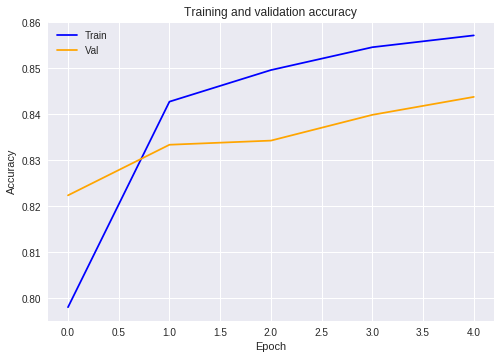

In [0]:
# Plot and compare the training and validation accuracy
# The history object contains results on the training and test
# sets for each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 2. Deep model
Implement and train a deep neural network to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.


In [0]:
model2 = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(256, 'relu'),
  Dense(128, 'relu'),
  Dense(10, 'softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.4835 - acc: 0.8267 - val_loss: 0.4339 - val_acc: 0.8417
Epoch 2/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.3587 - acc: 0.8684 - val_loss: 0.4566 - val_acc: 0.8332
Epoch 3/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.3233 - acc: 0.8811 - val_loss: 0.3613 - val_acc: 0.8698
Epoch 4/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3010 - acc: 0.8890 - val_loss: 0.3384 - val_acc: 0.8784
Epoch 5/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2840 - acc: 0.8942 - val_loss: 0.3582 - val_acc: 0.8717
Epoch 6/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2709 - acc: 0.8988 - val_loss: 0.3320 - val_acc: 0.8836
Epoch 7/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2549 - acc: 0.9044 

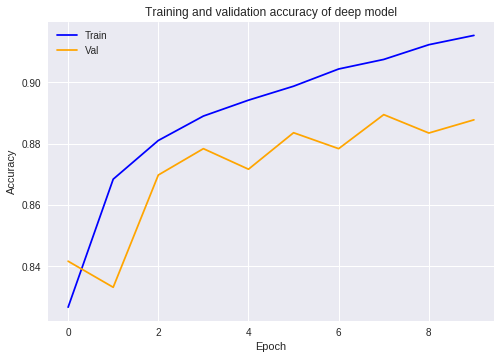

In [0]:
# Plot and compare the training and validation accuracy
# The history object contains results on the training and test
# sets for each epoch
acc = history2.history['acc']
val_acc = history2.history['val_acc']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy of deep model')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## 3. Diagram that visualizes 2 models
Produce a diagram that visualizes your linear and deep models using ​plot_model​. 

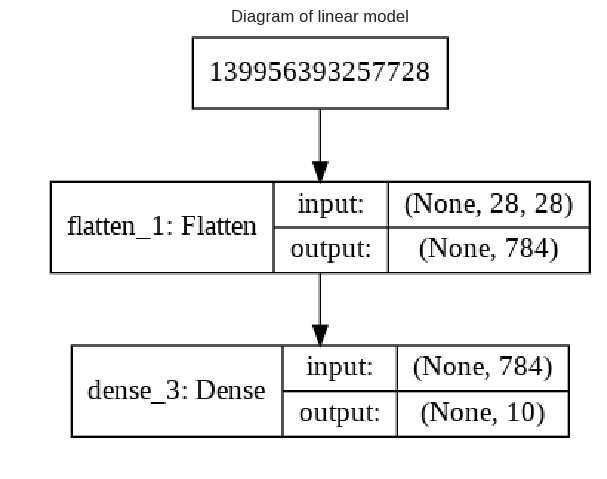

In [0]:
plot_model(model, show_shapes=True, to_file='linearModel.png')
plt.figure(dpi=100)
imgplot=plt.imshow(mpimg.imread('linearModel.png'))
plt.axis('off')
plt.title('Diagram of linear model')
plt.show()

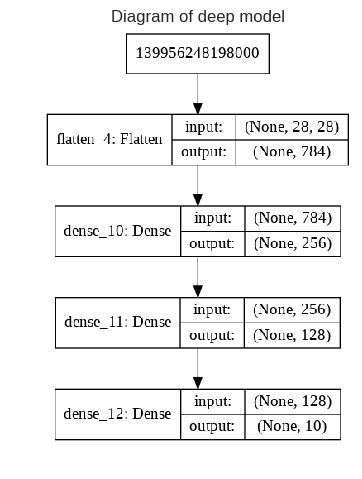

In [0]:
plot_model(model2, show_shapes=True, to_file='deepModel.png')
plt.figure(dpi=100)
imgplot=plt.imshow(mpimg.imread('deepModel.png'))
plt.axis('off')
plt.title('Diagram of deep model')
plt.show()

## 4. Confusion matrix
Produce a confusion matrix for one of your models. Here I choose the linear model.

*Evaluate classification quality with diagonal elements representing right predictions and off-diagonal elements representing mislabled.

In [0]:
# Compute confusion matrix for linear model
from sklearn.metrics import confusion_matrix
linear_pred = model.predict(x_test)
y_linear = []
for i in range(len(y_test)):
  y_linear.append(np.argmax(linear_pred[i]))
cmatrix_linear = confusion_matrix(y_test, y_linear)
cmatrix_linear

array([[842,   5,  15,  42,   6,   0,  79,   0,  11,   0],
       [  3, 960,   3,  25,   2,   0,   5,   0,   2,   0],
       [ 32,   6, 807,   7,  81,   1,  62,   0,   4,   0],
       [ 38,  16,  30, 835,  28,   0,  49,   0,   4,   0],
       [  1,   3, 194,  32, 671,   0,  93,   0,   6,   0],
       [  0,   0,   0,   1,   0, 913,   0,  49,   2,  35],
       [166,   3, 164,  26,  81,   0, 548,   0,  12,   0],
       [  0,   0,   0,   0,   0,  32,   0, 925,   0,  43],
       [  6,   1,  10,  10,   3,   5,  17,   5, 943,   0],
       [  0,   0,   0,   0,   0,   8,   1,  30,   0, 961]])

# Part 2 Keras Subclassing API
Set the environment to version 2.0.

In [0]:
print("You have version", tf.__version__)

You have version 1.13.0-rc1


In [0]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 77.9MB 384kB/s 
    100% |████████████████████████████████| 358kB 19.8MB/s 
    100% |████████████████████████████████| 3.2MB 10.4MB/s 
    100% |████████████████████████████████| 61kB 22.1MB/s 


In [0]:
assert tf.__version__ >= "2.0"

In [0]:
# After set version 2, run the first block again for import.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

# Batch and shuffle data
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

## 5. Linear model
Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. 

In [0]:
class LinearModel(Model):
  def __init__(self, inshape):
    super(LinearModel, self).__init__()
    self.flatten = Flatten(input_shape = inshape)
    #self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    #x = self.d1(x)
    return self.d2(x)
  
model = LinearModel((28,28))
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)
  

def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)
  

EPOCHS = 5
acc = []
val_acc = []

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  acc.append(train_accuracy_metric.result())
  val_acc.append(test_accuracy_metric.result())

Epoch 1, Loss: 0.7417, Accuracy: 75.55, Test loss: 0.5704, Test accuracy: 80.76
Epoch 2, Loss: 0.6288, Accuracy: 79.16, Test loss: 0.5419, Test accuracy: 81.58
Epoch 3, Loss: 0.5772, Accuracy: 80.77, Test loss: 0.5243, Test accuracy: 82.06
Epoch 4, Loss: 0.5459, Accuracy: 81.74, Test loss: 0.5119, Test accuracy: 82.38
Epoch 5, Loss: 0.5243, Accuracy: 82.40, Test loss: 0.5027, Test accuracy: 82.64


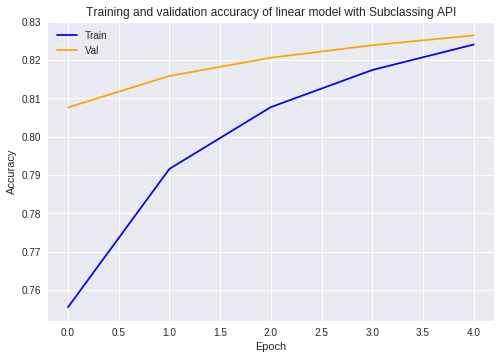

In [0]:
# The history object contains results on the training and test
# sets for each epoch

# Get the number of epochs
epochs = range(EPOCHS)

plt.title('Training and validation accuracy of linear model with Subclassing API')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 6. Deep model
Implement and train a deep model to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [0]:
# From example
class DeepModel(Model):
  def __init__(self, inshape):
    super(DeepModel, self).__init__()
    self.flatten = Flatten(input_shape=inshape)
    self.d1 = Dense(256, activation='relu')
    self.d2 = Dense(128, activation='relu')
    self.d3 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    return self.d3(x)
  
model = DeepModel((28,28))
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)
  

def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)
  

EPOCHS = 30
acc = []
val_acc = []

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  acc.append(train_accuracy_metric.result())
  val_acc.append(test_accuracy_metric.result())

Epoch 1, Loss: 0.5088, Accuracy: 82.06, Test loss: 0.4368, Test accuracy: 83.77
Epoch 2, Loss: 0.4383, Accuracy: 84.36, Test loss: 0.4206, Test accuracy: 84.09
Epoch 3, Loss: 0.4020, Accuracy: 85.54, Test loss: 0.4063, Test accuracy: 84.59
Epoch 4, Loss: 0.3774, Accuracy: 86.36, Test loss: 0.3964, Test accuracy: 84.94
Epoch 5, Loss: 0.3586, Accuracy: 87.00, Test loss: 0.3922, Test accuracy: 85.08
Epoch 6, Loss: 0.3435, Accuracy: 87.52, Test loss: 0.3875, Test accuracy: 85.28
Epoch 7, Loss: 0.3307, Accuracy: 87.96, Test loss: 0.3835, Test accuracy: 85.50
Epoch 8, Loss: 0.3193, Accuracy: 88.35, Test loss: 0.3806, Test accuracy: 85.66
Epoch 9, Loss: 0.3091, Accuracy: 88.70, Test loss: 0.3781, Test accuracy: 85.82
Epoch 10, Loss: 0.3001, Accuracy: 89.02, Test loss: 0.3750, Test accuracy: 86.01
Epoch 11, Loss: 0.2919, Accuracy: 89.31, Test loss: 0.3734, Test accuracy: 86.18
Epoch 12, Loss: 0.2844, Accuracy: 89.57, Test loss: 0.3728, Test accuracy: 86.29
Epoch 13, Loss: 0.2774, Accuracy: 89.

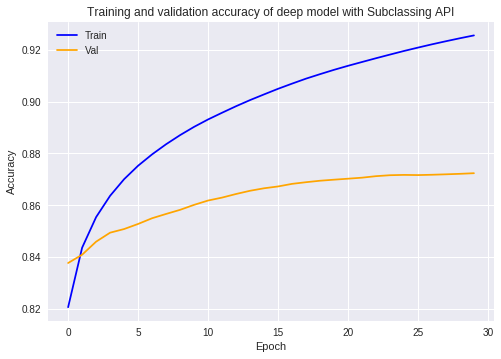

In [0]:
epochs = range(EPOCHS)

plt.title('Training and validation accuracy of deep model with Subclassing API')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()